# Lab 3: Analyzing Data

In [1]:
import numpy as np
import ugradio
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import astropy
from itertools import chain
from scipy import signal
import scipy

In [3]:
def PS(volts, times):
    """Takes in an array and outputs a discrete Fourier transform."""
    freq,fx = ugradio.dft.dft(volts, t=times)
    power = np.abs(fx)**2
    return freq, power

## The Sun

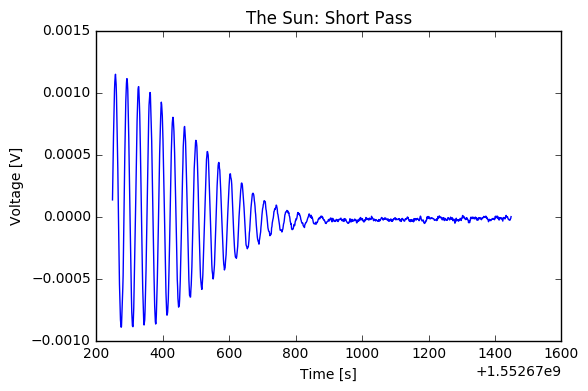

In [20]:
sun = np.load('sun_mar14.npz')
sun_times = sun['unitimes']
sun_volts = sun['volts']

plt.plot(sun_times, sun_volts, '-')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('The Sun: Short Pass')
plt.show()

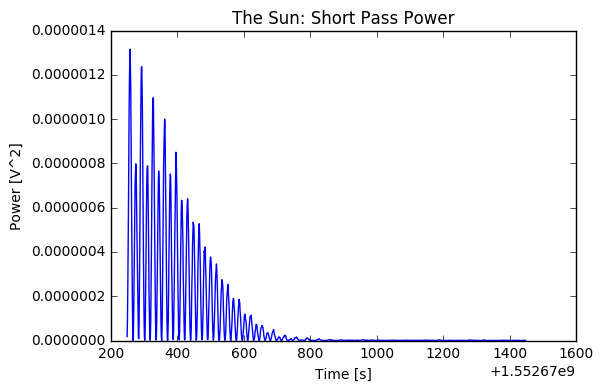

In [21]:
plt.plot(sun_times, sun_volts**2, '-')
plt.xlabel('Time [s]')
plt.ylabel('Power [V^2]')
plt.title('The Sun: Short Pass Power')
plt.show()

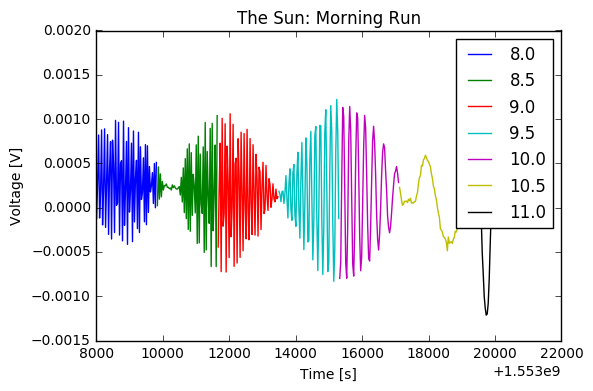

In [140]:
sun2 = np.load('sun_mar19.npz')
sun2_times = sun2['unitimes']
sun2_volts = sun2['volts']

for i in range(len(sun2_times)):
    plt.plot(sun2_times[i], sun2_volts[i], label=i*0.5+8)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('The Sun: Morning Run')
    
plt.legend()
plt.show()    

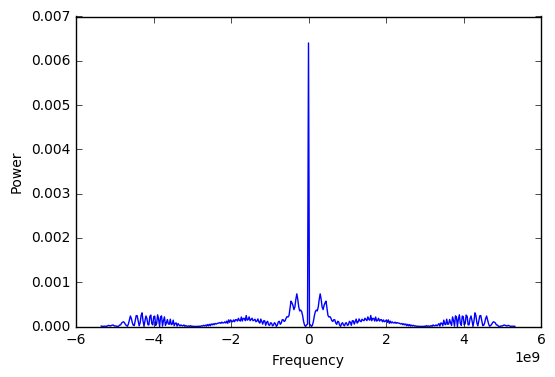

In [149]:
sun2_flat = list(chain.from_iterable(sun2_volts))

freq, power = PS(sun2_flat, 10.7e9)
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

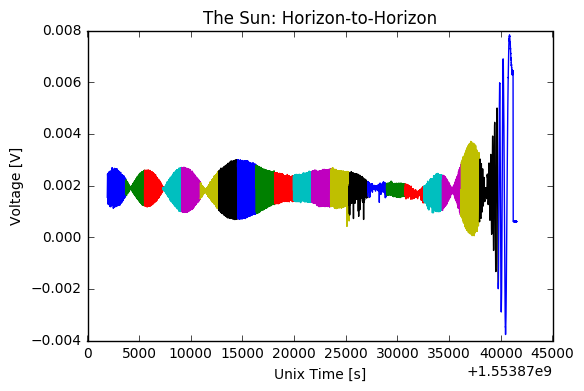

In [4]:
sun3 = np.load('sun_mar29.npz')
sun3_times = sun3['unitimes']
sun3_volts = sun3['volts']

for i in range(len(sun3_times)):
    plt.plot(sun3_times[i], sun3_volts[i])
    plt.xlabel('Unix Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('The Sun: Horizon-to-Horizon')
    
plt.show()    

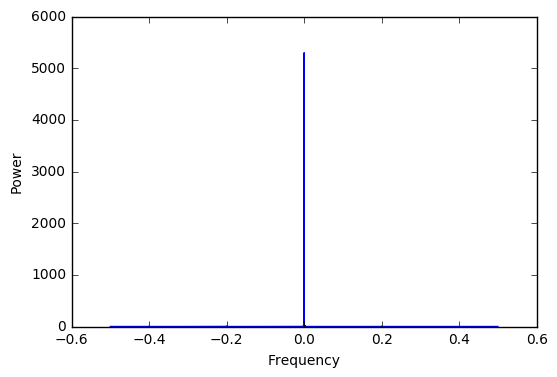

In [5]:
sun3_flat_volts = np.array(list(chain.from_iterable(sun3_volts)))
sun3_flat_times = np.array(list(chain.from_iterable(sun3_times)))


freq, power = PS(sun3_flat_volts, sun3_flat_times)
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

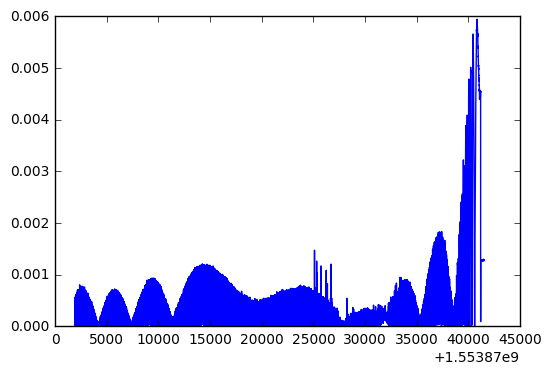

In [7]:
sun3_volts_flat = list(chain.from_iterable(sun3_volts))
sun3_times_flat = list(chain.from_iterable(sun3_times))

sun3_volts0 = sun3_volts_flat - np.average(sun3_volts_flat) # center voltages at zero

sun3_volts_abs = np.abs(sun3_volts0)
sun3_times_abs = np.abs(sun3_times_flat)

plt.plot(sun3_times_abs, sun3_volts_abs)
plt.show()

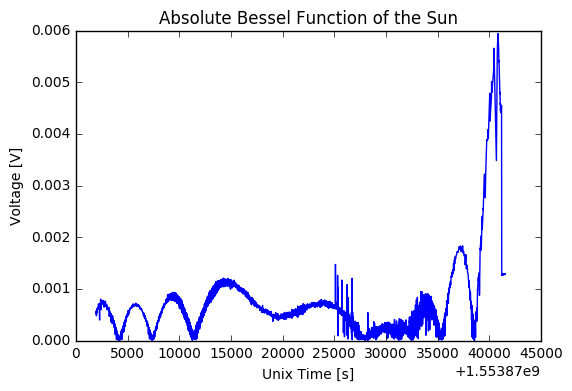

In [8]:
peak_indices, idk = signal.find_peaks(sun3_volts_abs)
sun3_times_peaks = sun3_times_abs[peak_indices]
sun3_volts_peaks = sun3_volts_abs[peak_indices]

plt.plot(sun3_times_peaks, sun3_volts_peaks)
plt.title('Absolute Bessel Function of the Sun')
plt.xlabel('Unix Time [s]')
plt.ylabel('Voltage [V]')
plt.show()

In [133]:
# local minima between times:
# 1000-6000
# 6000-9000
# 9000-15000
# 15000-24000
# 24000-30000
# 30000-33000
# 33000-37000
# 37000-45000

sun3_times_mod = sun3_times_peaks-1.55387e9
print "Time Range    : Index Range"
print "0 - 6000      : 0 -", np.max(np.where(sun3_times_mod < 6000))
print "6000 - 9000   :", np.max(np.where(sun3_times_mod < 6000)), "-", np.max(np.where(sun3_times_mod < 9000))
print "9000 - 15000  :", np.max(np.where(sun3_times_mod < 9000)), "-", np.max(np.where(sun3_times_mod < 15000))
print "15000 - 24000 :", np.max(np.where(sun3_times_mod < 15000)), "-", np.max(np.where(sun3_times_mod < 24000))
print "24000 - 30000 :", np.max(np.where(sun3_times_mod < 24000)), "-", np.max(np.where(sun3_times_mod < 30000))
print "30000 - 33000 :", np.max(np.where(sun3_times_mod < 30000)), "-", np.max(np.where(sun3_times_mod < 33000))
print "33000 - 37000 :", np.max(np.where(sun3_times_mod < 33000)), "-", np.max(np.where(sun3_times_mod < 37000))
print "37000 - 45000 :", np.max(np.where(sun3_times_mod < 37000)), "-", np.max(np.where(sun3_times_mod < 45000))

Time Range    : Index Range
0 - 6000      : 0 - 382
6000 - 9000   : 382 - 668
9000 - 15000  : 668 - 1160
15000 - 24000 : 1160 - 1850
24000 - 30000 : 1850 - 2590
30000 - 33000 : 2590 - 3062
33000 - 37000 : 3062 - 3419
37000 - 45000 : 3419 - 3836


In [134]:
# locate minima within each range

print "Indices of Local Minima:"
print np.argmin(sun3_volts_peaks[0:382])
print np.argmin(sun3_volts_peaks[382:668]) + 382
print np.argmin(sun3_volts_peaks[668:1160]) + 668
print np.argmin(sun3_volts_peaks[1160:1850]) + 1160
print np.argmin(sun3_volts_peaks[1850:2590]) + 1850
print np.argmin(sun3_volts_peaks[2590:3062]) + 2590
print np.argmin(sun3_volts_peaks[3062:3419]) + 3062
print np.argmin(sun3_volts_peaks[3419:3836]) + 3419

Indices of Local Minima:
197
526
840
1467
2364
2995
3310
3516


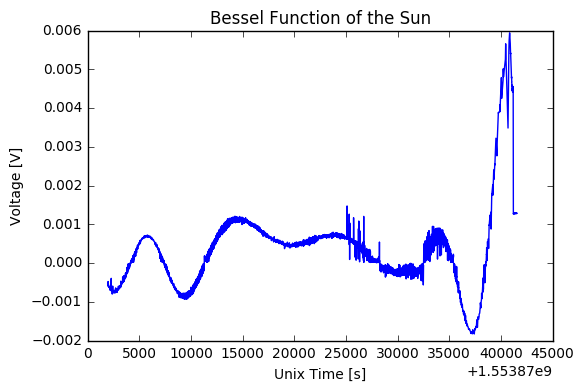

In [26]:
plt.plot(sun3_times_peaks[0:197], -sun3_volts_peaks[0:197], 'b')
plt.plot(sun3_times_peaks[197:526], +sun3_volts_peaks[197:526], 'b')
plt.plot(sun3_times_peaks[526:840], -sun3_volts_peaks[526:840], 'b')
plt.plot(sun3_times_peaks[840:2364], +sun3_volts_peaks[840:2364], 'b')
plt.plot(sun3_times_peaks[2364:2995], -sun3_volts_peaks[2364:2995], 'b')
plt.plot(sun3_times_peaks[2995:3310], +sun3_volts_peaks[2995:3310], 'b')
plt.plot(sun3_times_peaks[3310:3516], -sun3_volts_peaks[3310:3516], 'b')
plt.plot(sun3_times_peaks[3516:], +sun3_volts_peaks[3516:], 'b')
plt.title('Bessel Function of the Sun')
plt.xlabel('Unix Time [s]')
plt.ylabel('Voltage [V]')
plt.show()

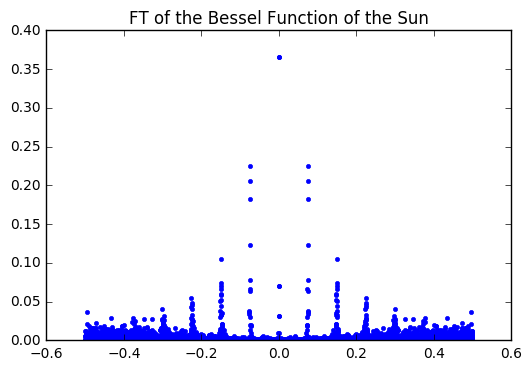

In [37]:
bessel_sun = [-sun3_volts_peaks[0:197], +sun3_volts_peaks[197:526], -sun3_volts_peaks[526:840], +sun3_volts_peaks[840:2364], -sun3_volts_peaks[2364:2995], +sun3_volts_peaks[2995:3310], -sun3_volts_peaks[3310:3516], +sun3_volts_peaks[3516:]]
bessel_sun_flat = list(chain.from_iterable(bessel_sun))

freq, fx = ugradio.dft.dft(bessel_sun_flat, sun3_times_peaks)
power = np.abs(fx)**2
plt.plot(freq, power, '.')
#plt.xlim(-0.005, 0.005)
#plt.ylim(0, 0.01)
plt.title('FT of the Bessel Function of the Sun')
plt.show()

## The Moon

In [11]:
moon = np.load('moon_mar17.npz')
moon_times = moon['unitimes']
moon_volts = moon['volts']

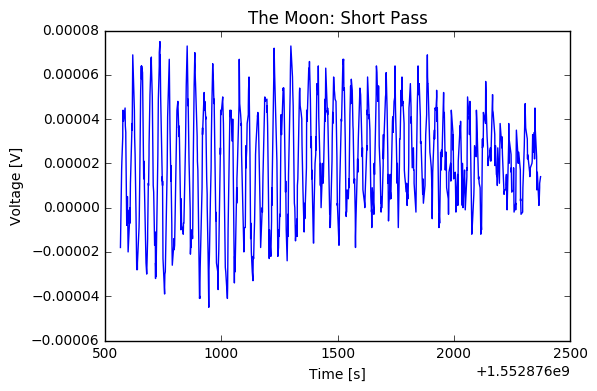

In [12]:
plt.plot(moon_times[0], moon_volts[0])
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('The Moon: Short Pass')
plt.show()

In [94]:
moon2 = np.load('moon_mar18.npz')
moon2_times = moon2['unitimes']
moon2_volts = moon2['volts']

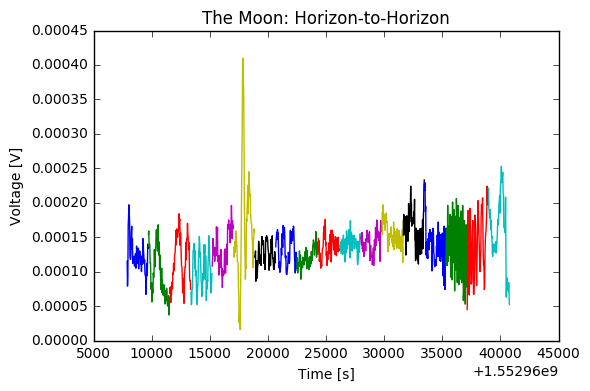

In [95]:
for i in range(len(moon2_times)):
    plt.plot(moon2_times[i], moon2_volts[i])
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('The Moon: Horizon-to-Horizon')
    
plt.show()    

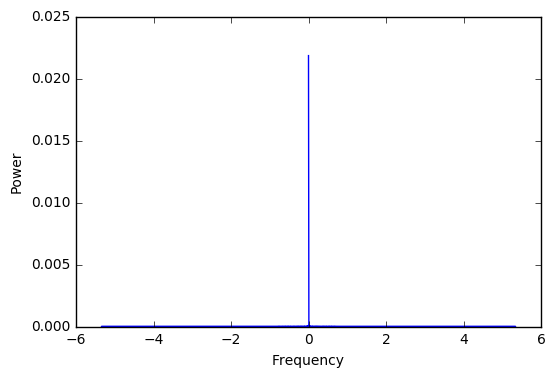

In [96]:
moon2_flat = list(chain.from_iterable(moon2_volts))

voltage = np.fft.fft(moon2_flat)
power = np.abs(voltage)**2
freq = np.fft.fftfreq(len(moon2_flat), 1/10.7)
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

## Cygnus

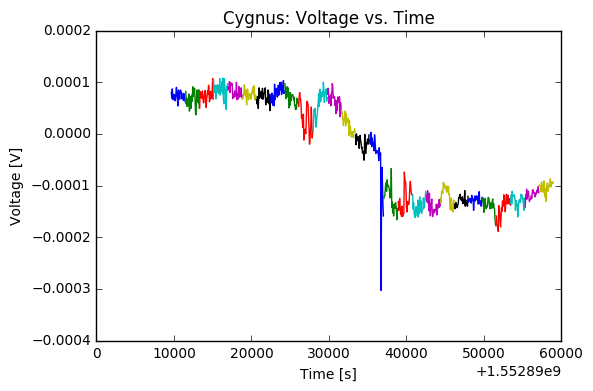

In [67]:
cygnus = np.load('cygnus_mar17.npz')
cygnus_times = cygnus['unitimes']
cygnus_volts = cygnus['volts']

for i in range(len(cygnus_times)):
    plt.plot(cygnus_times[i], cygnus_volts[i], '-', label=i*0.5+2)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('Cygnus: Voltage vs. Time')
    
plt.show()    

In [68]:
cygnus_flat = list(chain.from_iterable(cygnus_volts))

freq, power = PS(cygnus_flat, cygnus_times)
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

AssertionError: Samples and sample times do not match!

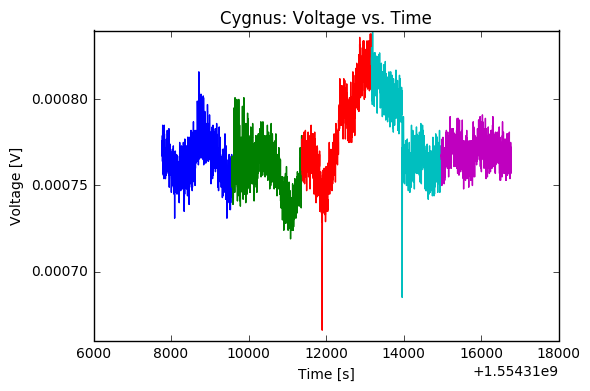

In [2]:
# April 3, ~12:00-1:30 pm

cygnus = np.load('cygnus_apr3.npz')
cygnus_times = cygnus['unitimes']
cygnus_volts = cygnus['volts']

for i in range(len(cygnus_times)):
    plt.plot(cygnus_times[i], cygnus_volts[i], '-')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('Cygnus: Voltage vs. Time')
    
plt.show()    

## Local Fringe Frequency

In [49]:
def lff_sun(jd, b_x, b_y):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    ra, dec = np.deg2rad(ugradio.coord.sunpos(jd))
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    lff = (((b_x/wl)*np.cos(dec))*np.cos(ha) - ((b_y/wl)*np.sin(L)*np.cos(dec))*np.sin(ha)) * (2*np.pi/86164)
    return lff

In [22]:
def lff_moon(jd, b_x, b_y):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    ra, dec = np.deg2rad(ugradio.coord.moonpos(jd))
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    lff = (((b_x/wl)*np.cos(dec))*np.cos(ha) - ((b_y/wl)*np.sin(L)*np.cos(dec))*np.sin(ha)) * (2*np.pi/86164)
    return lff

In [23]:
def lff_cyg(jd, b_x, b_y):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    ra = np.deg2rad(299.86815417)
    dec = np.deg2rad(40.73391667)
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    lff = (((b_x/wl)*np.cos(dec))*np.cos(ha) - ((b_y/wl)*np.sin(L)*np.cos(dec))*np.sin(ha)) * (2*np.pi/86164)
    return lff

In [11]:
b_x = 1500 # east-west baseline in centimeters (~50 ft)

### The Sun

In [50]:
sun_lff = []

for i in range(len(sun3_times)-1):
    jd = ugradio.timing.julian_date(sun3_times[i][0])
    lff = lff_sun(jd, 1500, 0)
    sun_lff.append(lff)
    
print "Range of expected fringe frequencies for the Sun horizon-to-horizon observation:", sun_lff

Range of expected fringe frequencies for the Sun horizon-to-horizon observation: [0.008830032801511805, 0.013713223474268288, 0.018361019022453767, 0.022694307254303943, 0.026638623903359637, 0.030126392747952584, 0.03309770586798473, 0.03550175369289815, 0.03729733378057003, 0.03845367900662069, 0.03895096454387068, 0.03878067072868786, 0.03794567699544548, 0.036460406423021605, 0.03435025702357529, 0.031650152669252904, 0.028408601167534586, 0.024680160107860036, 0.020528743217889854, 0.016025475283146864, 0.011247657140532663]


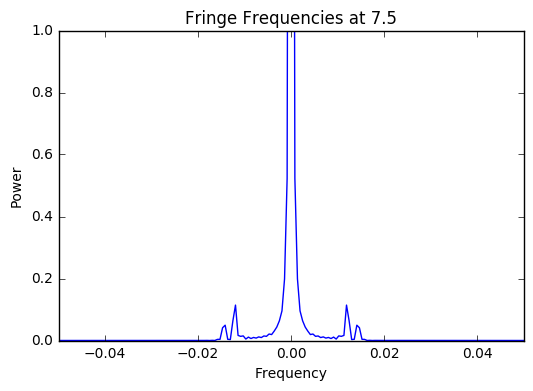

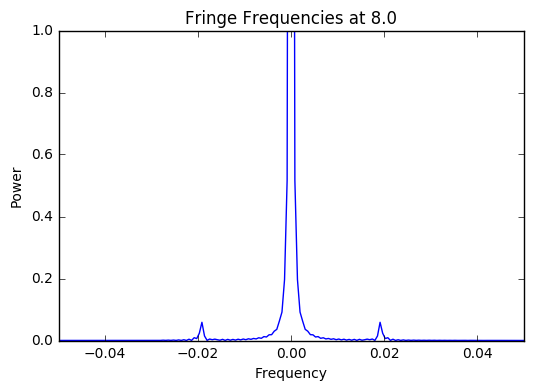

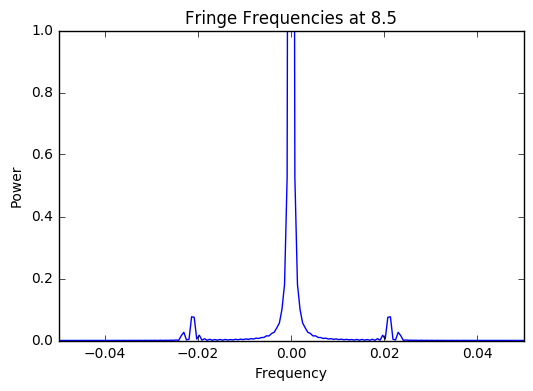

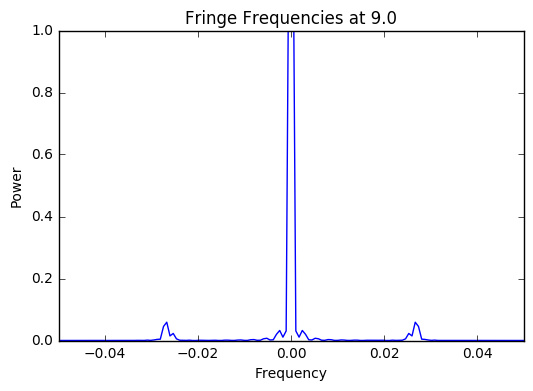

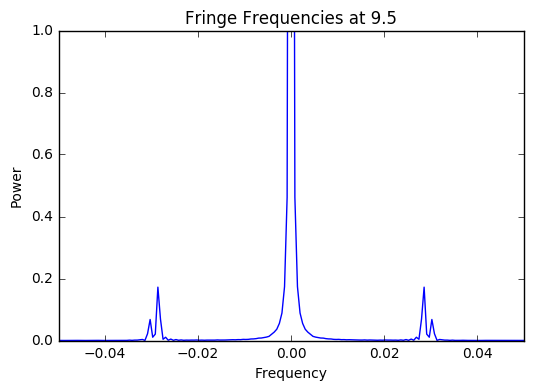

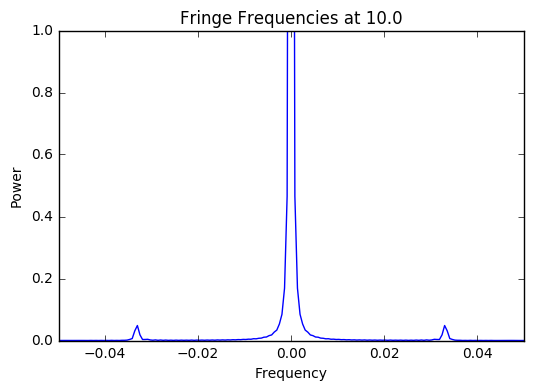

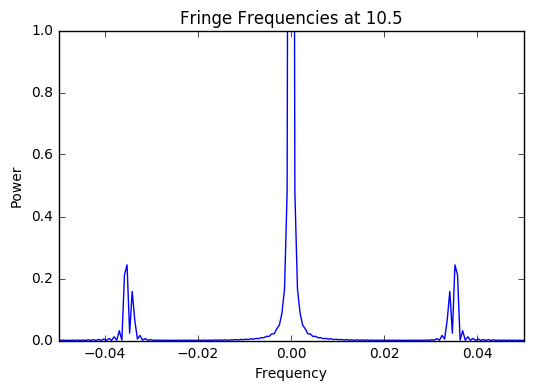

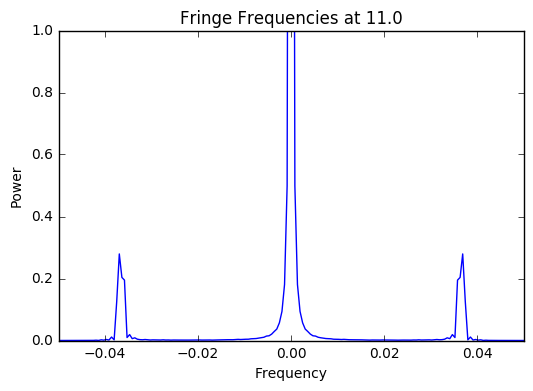

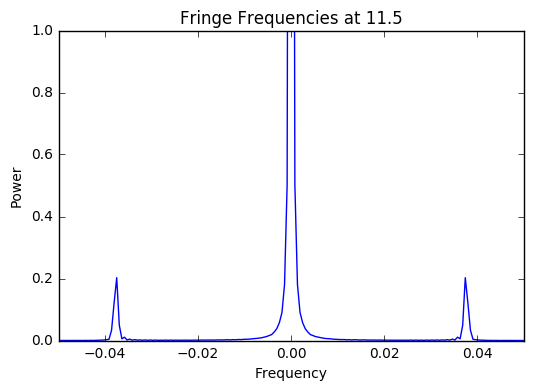

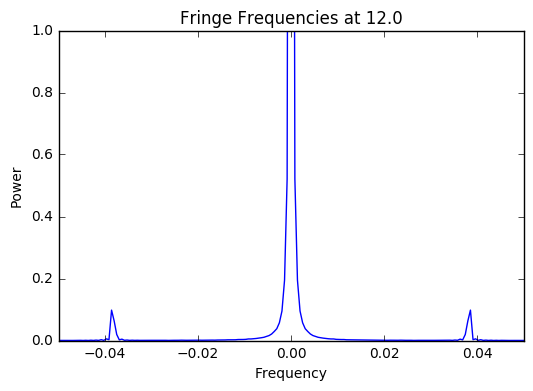

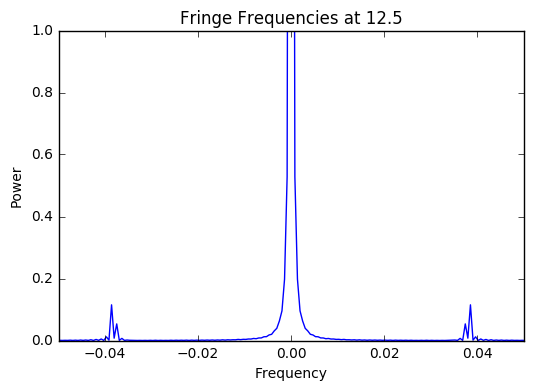

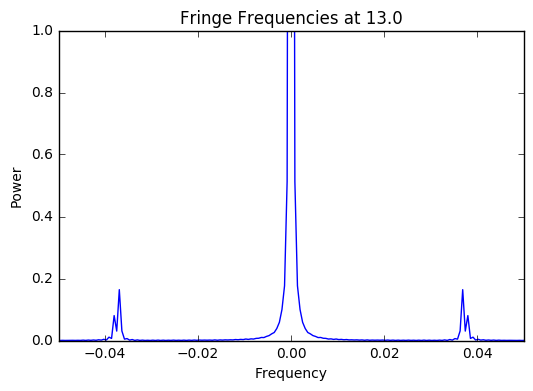

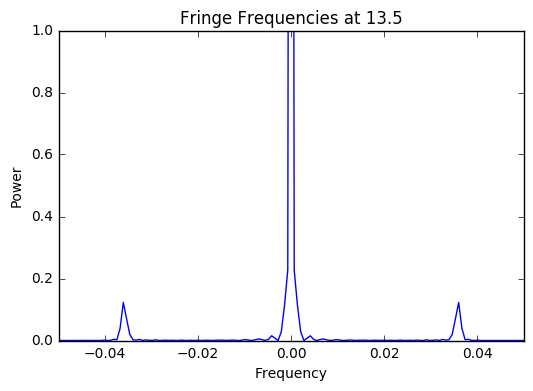

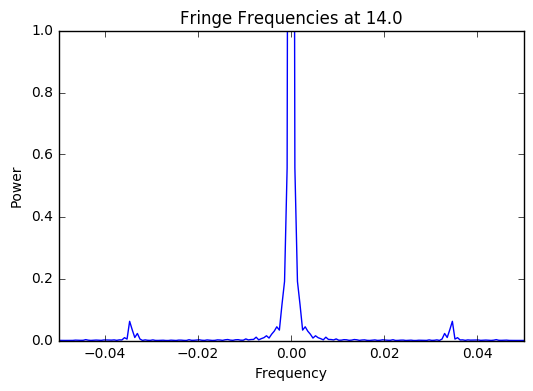

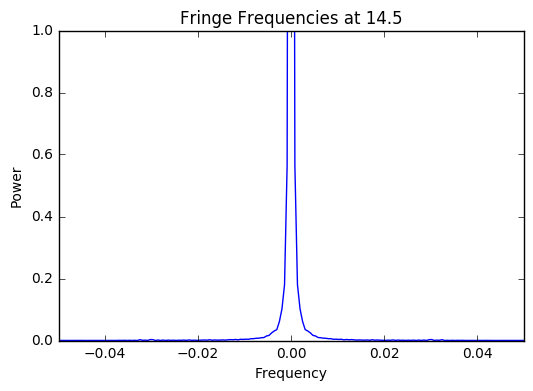

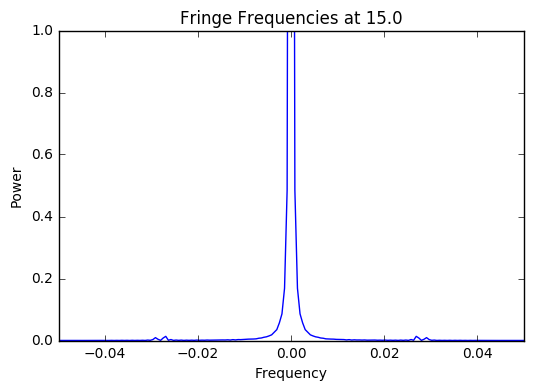

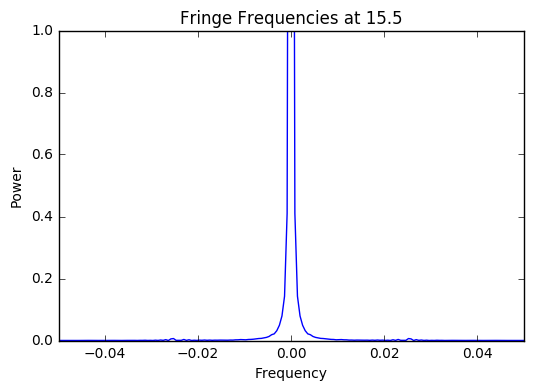

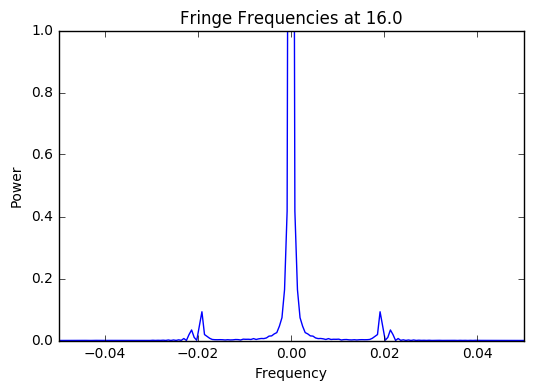

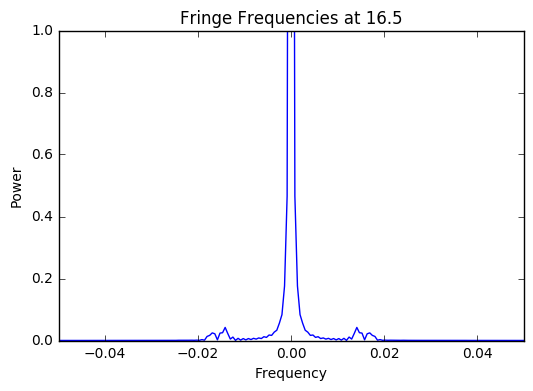

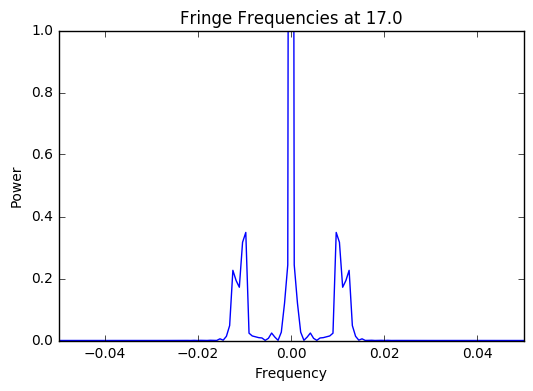

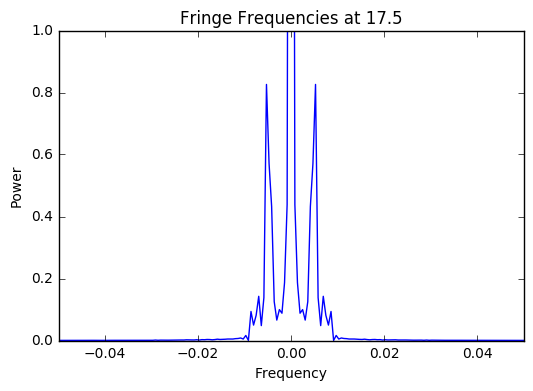

In [15]:
sun3 = np.load('sun_mar29.npz')
sun3_times = sun3['unitimes']
sun3_volts = sun3['volts']

for i in range(len(sun3_volts)-1):
    freq,fx = ugradio.dft.dft(sun3_volts[i], sun3_times[i])
    power = np.abs(fx)**2
    plt.plot(freq, power)
    plt.title("Fringe Frequencies at " + str(i*0.5 + 7.50))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(-.05, .05)
    plt.ylim(0, 1)
    plt.show()

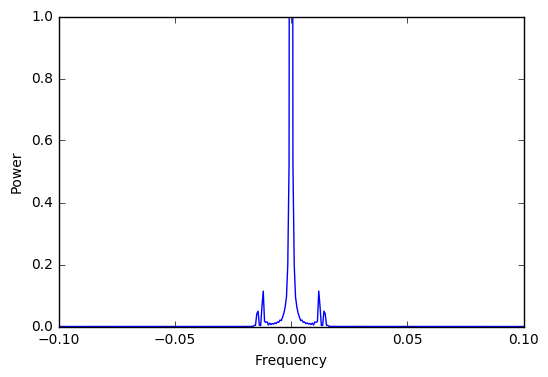

In [11]:
freq,fx = ugradio.dft.dft(sun3_volts[0], sun3_times[0])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.1, .1)
plt.ylim(0, 1)
plt.show()

In [12]:
freq,fx = ugradio.dft.dft(sun3_volts[0], sun3_times[0])
power = np.abs(fx)**2
spikes = np.where(power > 0.05)
freq[spikes]

# first and last numbers are fringe frequencies?

array([-0.01249306, -0.01193781, -0.00249861, -0.00194336, -0.00138812,
       -0.00083287, -0.00027762,  0.00027762,  0.00083287,  0.00138812,
        0.00194336,  0.00249861,  0.01193781,  0.01249306])

### Cygnus

In [24]:
jd2 = 2458568.87500
jd4 = 2458568.95833
jd6 = 2458569.04167
jd8 = 2458569.12500
jd10 = 2458569.20833
jd12 = 2458569.29167
jd14 = 2458569.37500

print "Range of expected fringe frequencies for Cygnus horizon-to-horizon observation:"
print(lff_cyg(jd2, 1500, 0)) # starting point - 2:00 am PDT, 3/26/19
print(lff_cyg(jd4, 1500, 0))
print(lff_cyg(jd6, 1500, 0))
print(lff_cyg(jd8, 1500, 0))
print(lff_cyg(jd10, 1500, 0))
print(lff_cyg(jd12, 1500, 0))
print(lff_cyg(jd14, 1500, 0)) # ending point - 2:00 pm PDT, 3/26/19

Range of expected fringe frequencies for Cygnus horizon-to-horizon observation:
-0.006958722936708099
0.008389792015953267
0.021479684999796446
0.028781947767882714
0.028331404688694092
0.02024805676116211
0.006711157962825606


In [26]:
c = 299792458  # speed of light in meters/second
f = 10.7e9     # sampling frequency of detectors in Hz
wl = c/f*100   # wavelength in centimeters
dec = np.deg2rad(40.73391667)
lff = ((1500/wl)*np.cos(dec)) * (2*np.pi/86164)
period = 1/lff
print"Expected local fringe frequency at meridian:", lff, "Hz"
print"Expected period at meridian:", period, "seconds"

Expected local fringe frequency at meridian: 0.029582389918027092 Hz
Expected period at meridian: 33.80389491082376 seconds


In [4]:
cygnus = np.load('cygnus_mar17.npz')
cygnus_times = cygnus['unitimes']
cygnus_volts = cygnus['volts']

In [ ]:
Q_ew = (b_x/wl)*np.cos(dec)

Q_ns = (b_y/wl)*np.sin(L)*np.cos(dec)

ra = np.deg2rad(299.86815417)
lst = ugradio.timing.lst(jd)
ha = ra - lst  # hour angle in radians

lff = Q_ew * np.cos(ha) - Q_ns * np.sin(ha)

In [ ]:
def chisq(ys, mdl, sig):
    return np.sum(np.abs(ys-mdl)**2/sig**2)

sig = 1
# ys = experimental results, local fringe frequencies
# mdl = function of guessed values, lff = Q_ew * np.cos(ha) - Q_ns * np.sin(ha)

# Plot chi squared for various values of Q_ew.
# The best value of Q_ew is where chi squared is minimized.
# Solve for the declination using the best value of Q_ew.

## Fringe Amplitude for a Point Source

In [ ]:
t_g = ((b_x/c)*np.cos(dec))*np.sin(ha) - ((b_y/c)*np.sin(L)*np.cos(dec))*np.cos(ha)
t_c = 

In [69]:
A = np.cos(2*np.pi*nu*t_c)
B = np.sin(2*np.pi*nu*t_c)
F = A*np.cos(2*np.pi*nu*t_g) - B*np.sin(2*np.pi*nu*t_g)

NameError: name 'nu' is not defined

## Measuring the Radius of a Circular Source

In [ ]:
MF_t = dec * h * np.sum(np.sqrt(1 - (n/N)**2) * np.cos(2*np.pi*lff*R*n/N))
# theoretical modulating function
# n from -N to +N
# a function only of the combination lff*R
# compare zero crossings of theoretical to observed to determine radius

In [40]:
def MF_theory(jd, lff, R):
    """Theoretical modulating function for the Sun.
    
    Parameters
    ----------
    jd : range of Julian dates
    R : radius

    Returns
    -------
    """
    
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    ra, dec = np.deg2rad(ugradio.coord.sunpos(jd))
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    N = 1000
    n = np.arange(-N,N+1) # np.arange does not include the endpoint
    MF_t = dec * ha * np.sum(np.sqrt(1 - (n/N)**2) * np.cos(2*np.pi*lff*R*n/N))
    return MF_t

In [39]:
jd = np.linspace()
R = 
MF_theory()

NameError: global name 'h' is not defined

### Angular Radius of the Sun

In [16]:
R = 695510000. # meters
d = 149597870700. # meters
theta = np.arctan(R/d)
print "Expected angular radius of the Sun:", theta, "radians"
print "Expected angular diameter of the Sun:", theta*2, "radians"

Expected angular radius of the Sun: 0.0046491636923241255 radians
Expected angular diameter of the Sun: 0.009298327384648251 radians


In [9]:
# times of local minima
mini = [197, 526, 840, 1467, 2364, 2995, 3310, 3516]
sun3_times_peaks[mini]

array([1.55387415e+09, 1.55387739e+09, 1.55388129e+09, 1.55388906e+09,
       1.55389826e+09, 1.55390251e+09, 1.55390542e+09, 1.55390853e+09])

In [10]:
scipy.special.jn_zeros(1, 8)

array([ 3.83170597,  7.01558667, 10.17346814, 13.32369194, 16.47063005,
       19.61585851, 22.76008438, 25.90367209])

In [11]:
# do not remember what x is supposed to be

x = scipy.special.jn_zeros(1, 8)
jd = ugradio.timing.julian_date(sun3_times_peaks[mini])

theta_sun = []

for i in range(len(jd)-1):
    ra, dec = np.deg2rad(ugradio.coord.sunpos(jd[i]))
    lst = ugradio.timing.lst(jd[i])
    ha = ra - lst  # hour angle in radians

    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    b_x = 1500

    u = b_x/wl * np.cos(ha)
    theta = x[i] / (2*np.pi*u)
    theta_sun.append(theta)
    
print(theta_sun)

[0.002988538967535363, 0.003554972941415913, 0.003829922043110844, 0.003978961905456015, 0.005831330998300315, 0.009187782434386924, 0.014764098720315626]


In [24]:
theta_sun_mod = [0.002988538967535363, 0.003554972941415913, 0.003829922043110844, 0.003978961905456015, 0.005831330998300315, 0.014764098720315626]

sigma = np.std(theta_sun_mod)/np.sqrt(2)
chisq = np.sum(np.abs(theta_sun_mod-theta)**2/sigma**2)
chi = chisq/len(theta_sun_mod)
print(chi)
print(np.average(theta_sun_mod)-theta)

2.164993185736985
0.0011754739036982202


### Angular Radius of the Moon